<a href="https://colab.research.google.com/github/ruksz/Bike-Sharing-Demand-Prediction-Capstone/blob/main/Capstone_Regression_Bike_Sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Rukshar Shaikh


# **Project Summary -**

The "Bike Sharing Demand Prediction" project is aimed at helping bike-sharing companies effectively manage their resources and provide a better service to customers. It uses historical data and machine learning to predict the number of bike rentals on any given day. By doing so, it ensures that the right number of bikes are available where and when they are needed, thus maximizing customer satisfaction and operational efficiency.



# **GitHub Link -**

https://github.com/ruksz/Bike-Sharing-Demand-Prediction-Capstone.git

# **Problem Statement**


This "Bike Sharing Demand Prediction" project aims to help bike rental companies deal with the challenge of knowing how many bikes they need at any given time. It's tricky for these companies because the number of people renting bikes can change a lot from one moment to the next. If they have too few bikes, customers get frustrated because there aren't enough to go around. But if they have too many bikes, it's a waste of money because those extra bikes aren't getting used.

So, our project is all about using computer programs to predict how many bikes will be needed. This prediction will help bike rental companies make sure they have just the right number of bikes available, so customers are happy, and the companies save money. It's a win-win situation for everyone!

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



#libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,cross_val_score

#libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error



### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
data = pd.read_csv('/content/drive/MyDrive/MLProject/SeoulBikeData.csv', encoding='ISO-8859-1')

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

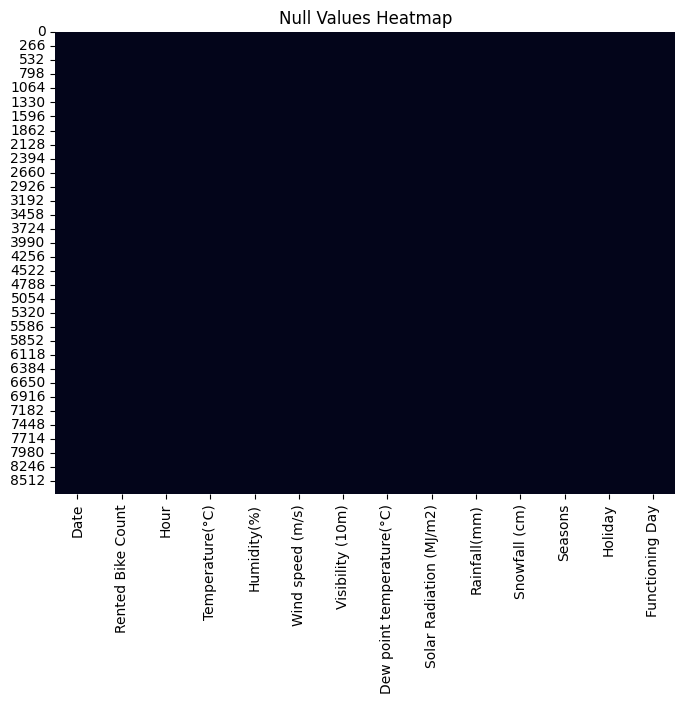

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

### What did you know about your dataset?

In [ ]:
data.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

Date: The date of the recorded data.

Rented Bike Count: The number of bikes rented or used on that date.

Hour: The hour of the day when the data was recorded.

Temperature (°C): The temperature in degrees Celsius.

Humidity (%): The relative humidity as a percentage.

Wind Speed (m/s): The wind speed in meters per second.

Visibility (10m): The visibility in meters.

Dew Point Temperature (°C): The dew point temperature in degrees Celsius.

Solar Radiation (MJ/m2): The solar radiation measured in mega-joules per square meter.

Rainfall (mm): The amount of rainfall in millimeters.

Snowfall (cm): The amount of snowfall in centimeters.

Seasons: The season when the data was recorded (e.g., Winter, Spring).

Holiday: Whether it was a holiday on that date (e.g., No Holiday).

Functioning Day: Indicates whether it was a functioning day (e.g., Yes).

This dataset seems to be suitable for time-series analysis and regression tasks, as it contains both temporal and weather-related features that can be used to predict the demand for rented bikes.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("Unique values in ",i,"is: ",data[i].nunique())

Unique values in  Date is:  365
Unique values in  Rented Bike Count is:  2166
Unique values in  Hour is:  24
Unique values in  Temperature(°C) is:  546
Unique values in  Humidity(%) is:  90
Unique values in  Wind speed (m/s) is:  65
Unique values in  Visibility (10m) is:  1789
Unique values in  Dew point temperature(°C) is:  556
Unique values in  Solar Radiation (MJ/m2) is:  345
Unique values in  Rainfall(mm) is:  61
Unique values in  Snowfall (cm) is:  51
Unique values in  Seasons is:  4
Unique values in  Holiday is:  2
Unique values in  Functioning Day is:  2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df=data.copy()

In [ ]:
# converting date column dtype object to date
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type

In [ ]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

In [ ]:
df.head(3)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   
2           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week    month  year  
0    Thursday  January  2017  
1    Thursday  January  2017  
2    Thursday  January  2017

In [ ]:
categorical_features = df.select_dtypes(include = 'object')
numerical_features = df.select_dtypes(exclude = 'object')

In [ ]:
categorical_features.head(2)

Seasons     Holiday Functioning Day day_of_week    month  year
0  Winter  No Holiday             Yes    Thursday  January  2017
1  Winter  No Holiday             Yes    Thursday  January  2017

In [ ]:
numerical_features.head(2)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0

### What all manipulations have you done and insights you found?

When we observe the data we can see that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

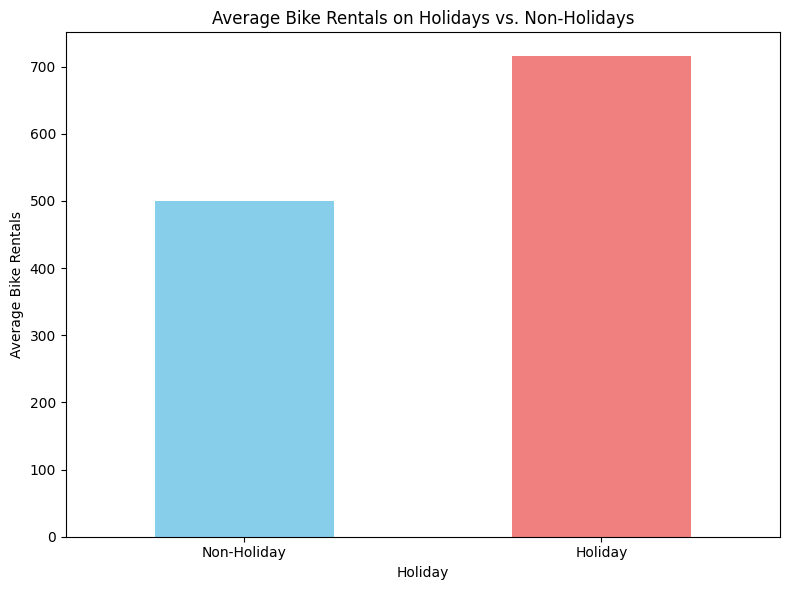

In [ ]:
# Chart - 1 visualization code
rentals_by_holiday = df.groupby('Holiday')['Rented Bike Count'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
rentals_by_holiday.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Bike Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Bike Rentals')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Is there a difference in bike rentals on holidays vs. non-holidays?

##### 2. What is/are the insight(s) found from the chart?

This bar chart compares bike rentals on holidays and non-holidays. In holidays average bike rental increases

#### Chart - 2

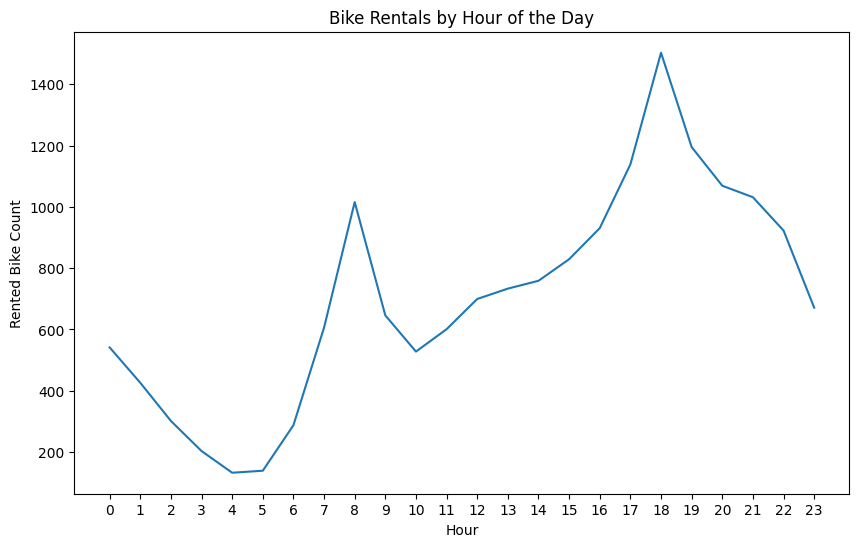

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', ci=None)
plt.title('Bike Rentals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.xticks(range(24))
plt.show()

##### 1. Why did you pick the specific chart?

What is the hourly trend in bike rentals?

##### 2. What is/are the insight(s) found from the chart?

The line plot illustrates how bike rentals vary by the hour of the day. It reveals peak rental hours and the overall pattern of bike usage throughout the day.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

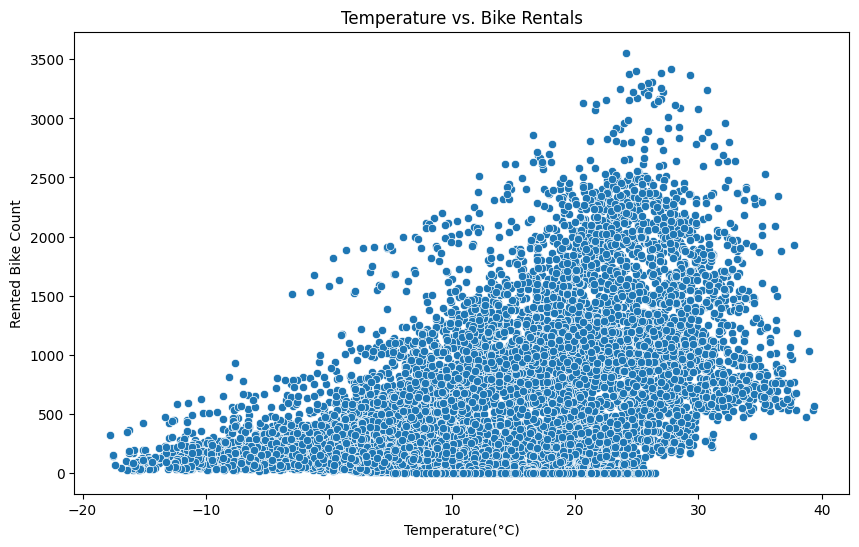

In [ ]:
# Chart - 3 visualization code

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature(°C)', y='Rented Bike Count')
plt.title('Temperature vs. Bike Rentals')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

How does bike rental demand vary with temperature?

##### 2. What is/are the insight(s) found from the chart?

The scatterplot examines the relationship between temperature and bike rentals. It helps us understand how temperature influences bike rental demand.


#### Chart - 4

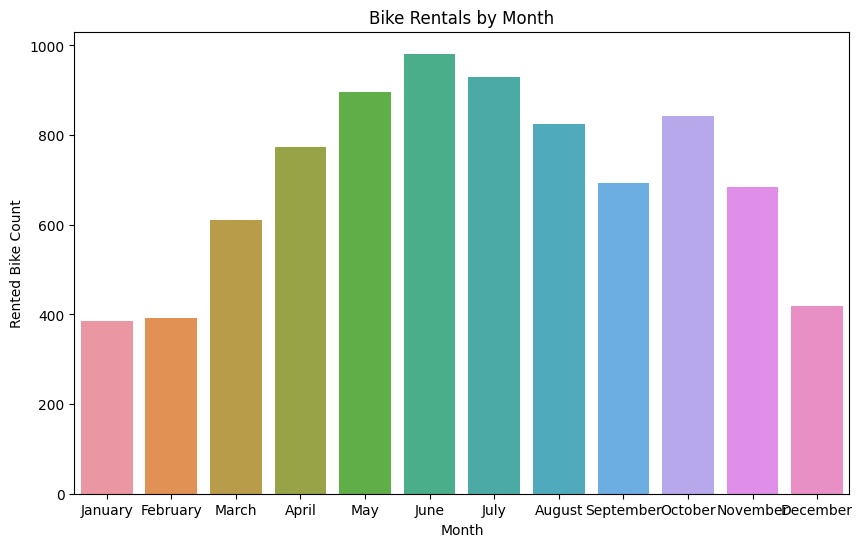

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='month', y='Rented Bike Count', ci=None)
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

Are there any seasonal patterns in bike rentals?

##### 2. What is/are the insight(s) found from the chart?

The bar chart presents bike rentals by month, allowing us to identify any seasonal trends in bike usage.


#### Chart - 5

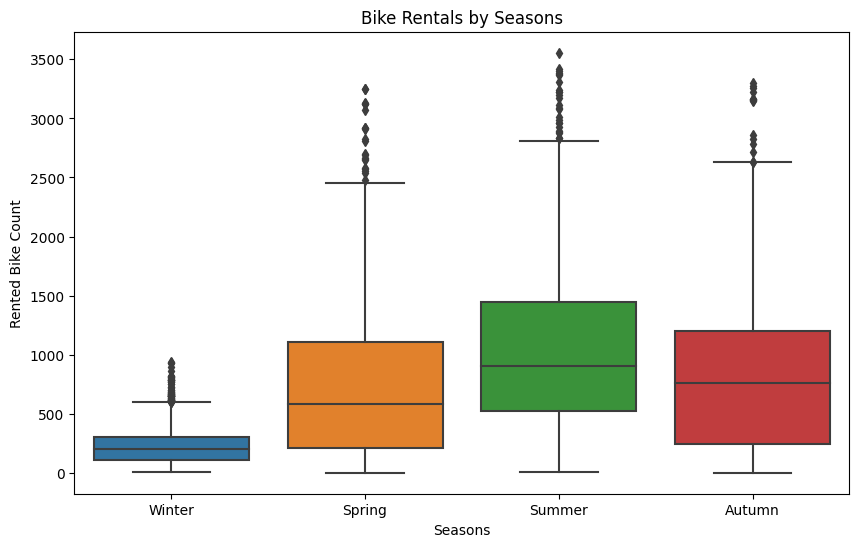

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Seasons', y='Rented Bike Count')
plt.title('Bike Rentals by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

Does weather condition affect bike rentals?

##### 2. What is/are the insight(s) found from the chart?

This box plot visualizes bike rentals across different seasons: Spring, Summer, Autumn, and Winter. It provides insights into how bike rental counts vary with changing seasons.

#### Chart - 6

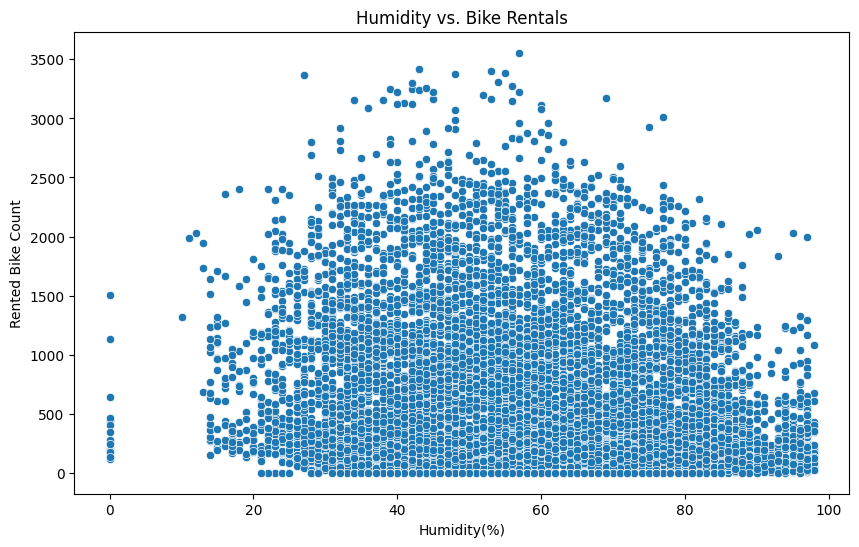

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Humidity(%)', y='Rented Bike Count')
plt.title('Humidity vs. Bike Rentals')
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

 How does bike rental demand change with humidity?

##### 2. What is/are the insight(s) found from the chart?

The scatterplot explores how humidity levels are related to bike rental counts.

#### Chart - 7

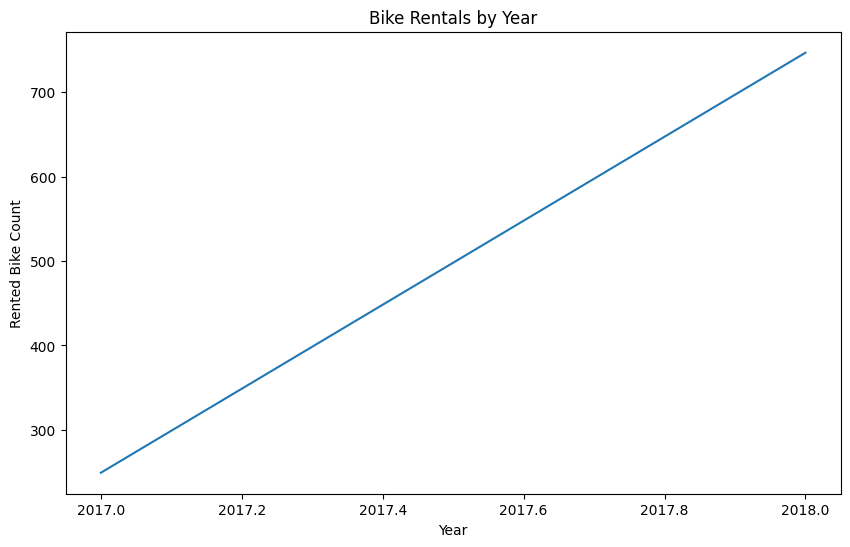

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Rented Bike Count', ci=None)
plt.title('Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

How has bike rental demand changed over the years?

##### 2. What is/are the insight(s) found from the chart?

The line plot visualizes bike rentals over the years, showing how the demand for bike rentals has evolved

#### Chart - 8

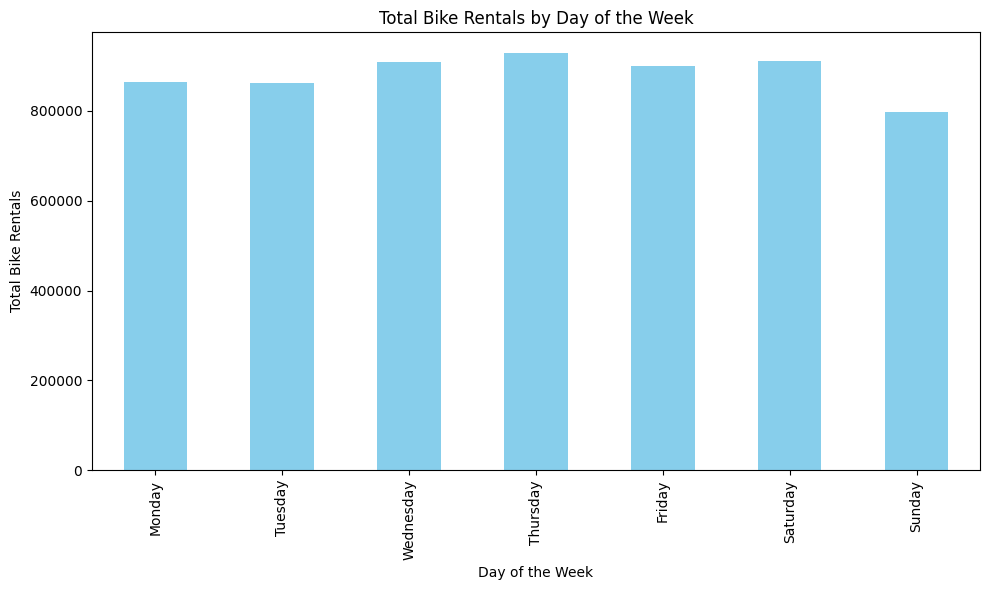

In [ ]:
# Chart - 8 visualization code
rentals_by_day = df.groupby('day_of_week')['Rented Bike Count'].sum()

# Define the order of days of the week for proper sorting
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar chart
plt.figure(figsize=(10, 6))
rentals_by_day[days_of_week_order].plot(kind='bar', color='skyblue')
plt.title('Total Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Does the day of the week impact bike rental demand?

##### 2. What is/are the insight(s) found from the chart?

 Bar chart showing bike rentals on each day of the week. Highest are on Thursday whereas lowest bike renatls are on Sunday

#### Chart - 9

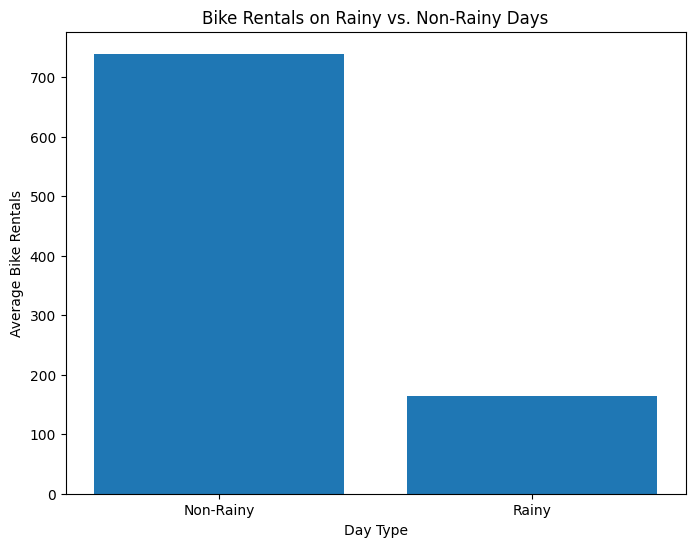

In [ ]:
# Chart - 9 visualization code
df['Rainy'] = df['Rainfall(mm)'].apply(lambda x: 'Rainy' if x > 0 else 'Non-Rainy')

# Group the data by the 'Rainy' column and calculate the mean of 'Rented Bike Count'
rainy_vs_non_rainy = df.groupby('Rainy')['Rented Bike Count'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(rainy_vs_non_rainy['Rainy'], rainy_vs_non_rainy['Rented Bike Count'])
plt.title('Bike Rentals on Rainy vs. Non-Rainy Days')
plt.xlabel('Day Type')
plt.ylabel('Average Bike Rentals')
plt.show()

##### 1. Why did you pick the specific chart?

Are bike rentals affected by rain?

##### 2. What is/are the insight(s) found from the chart?

Average bike rentals are more on non-rainy days compare to rainy days.

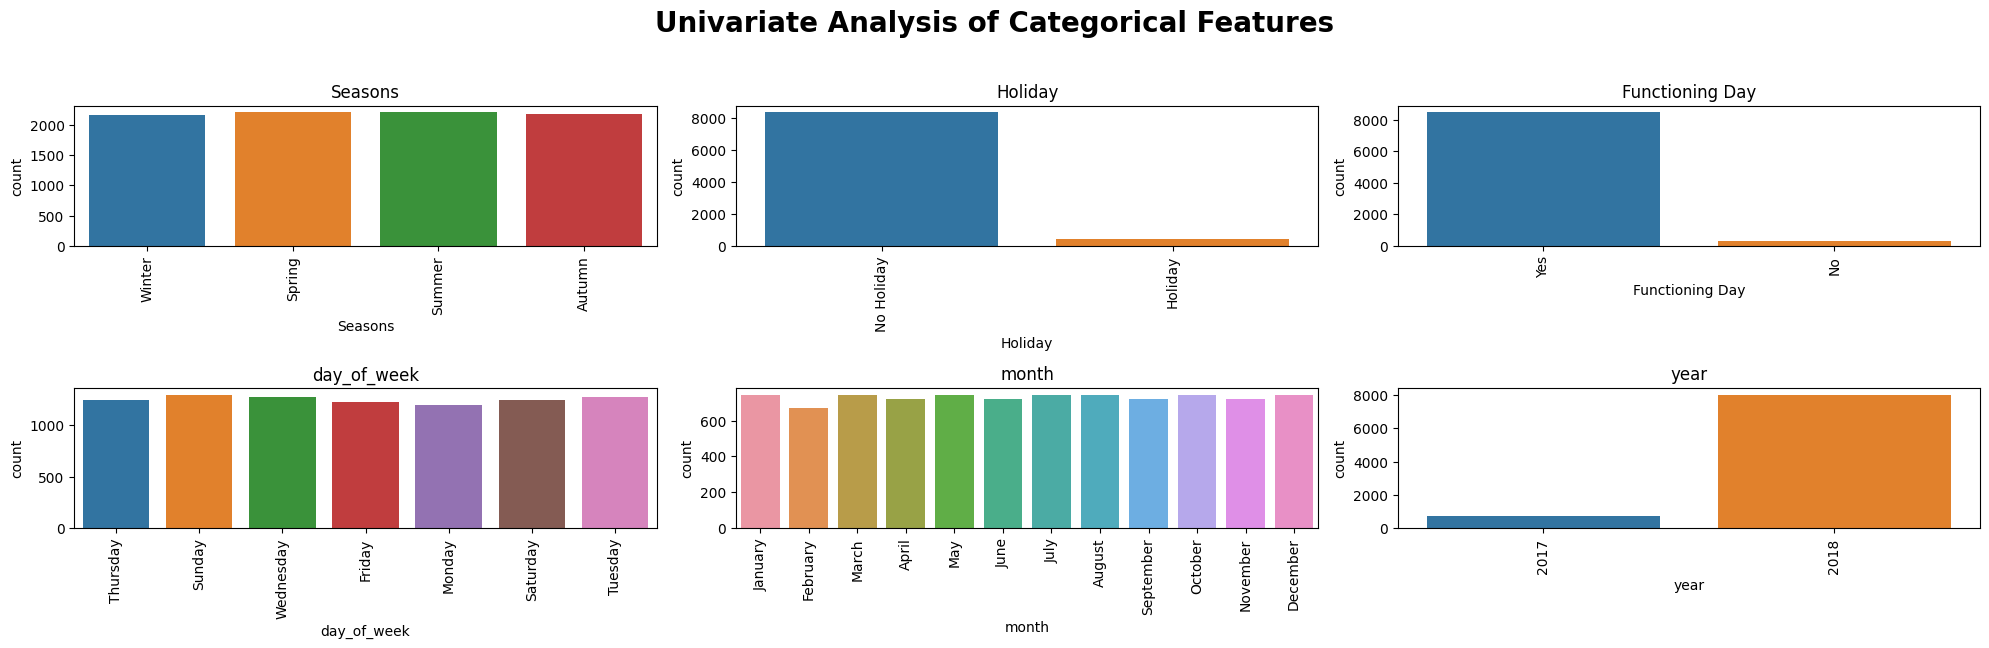

In [ ]:
# figure
plt.figure(figsize = (20,8))

# title
plt.suptitle('Univariate Analysis of Categorical Features', fontsize = 20, fontweight = 'bold', y = 1.02)

for i, col in enumerate(categorical_features):
  # subplots of
  plt.subplot(3,3, i+1)

  # Countplots
  sns.countplot(x = categorical_features[col])

  plt.xticks(rotation ='vertical')
  plt.title(col)
  plt.tight_layout()

Every season has almost equal number of counts.

Dataset has more records of No holiday than a holiday which is obvious as most of the days are working days.

Dataset has more records of Functioning Day than no functioning day which is obvious as most of the days are working days.

Except Friday, other Days have equal number of counts in the dataset.

Months like April, June, September, November & February have a slightly low number of count comparted to other months.

More data was colected in the year 2018 than 2017.

#### Correlation Heatmap

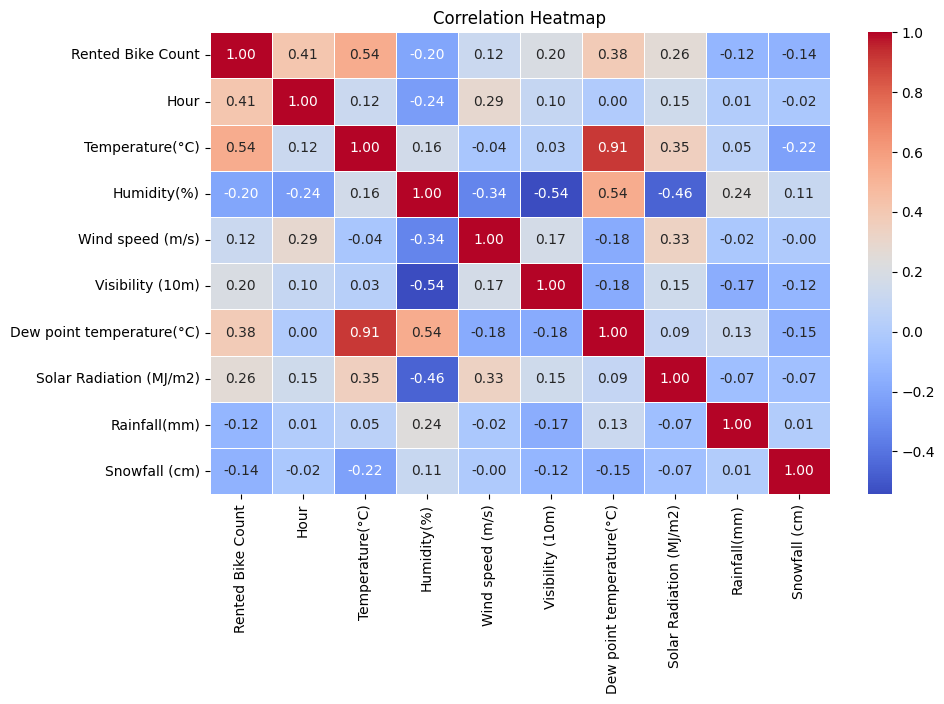

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

This heatmap provides insights into the relationships between various weather and time-related variables and the number of rented bikes. It helps identify the key factors influencing bike rental demand, which can be valuable for predictive modeling and decision-making in the bike-sharing industry.

##### 2. What is/are the insight(s) found from the chart?

Rented Bike Count vs. Temperature(°C): There is a positive correlation of approximately 0.54. As temperature increases, bike rentals tend to increase. This is expected as people are more likely to ride bikes in warmer weather.

Rented Bike Count vs. Hour: There is a moderate positive correlation of around 0.41. Bike rentals tend to be higher during certain hours, possibly peak commuting times.

Rented Bike Count vs. Humidity(%): There is a negative correlation of about -0.20. As humidity increases, bike rentals decrease, although the correlation is relatively weak.

Rented Bike Count vs. Wind Speed (m/s): There is a positive correlation of approximately 0.12. Higher wind speeds may be associated with slightly higher bike rentals.

Rented Bike Count vs. Dew Point Temperature(°C): There is a positive correlation of about 0.38. As the dew point temperature increases, bike rentals tend to increase.

Rented Bike Count vs. Solar Radiation (MJ/m2): There is a positive correlation of approximately 0.26. Bike rentals are influenced by the amount of solar radiation, with more rentals occurring on sunnier days.

Rented Bike Count vs. Rainfall(mm) and Snowfall (cm): Both rainfall and snowfall have negative correlations with bike rentals, though the correlations are weak. Rainy or snowy conditions tend to decrease bike rentals, but the effect is not very strong.


####  Pair Plot

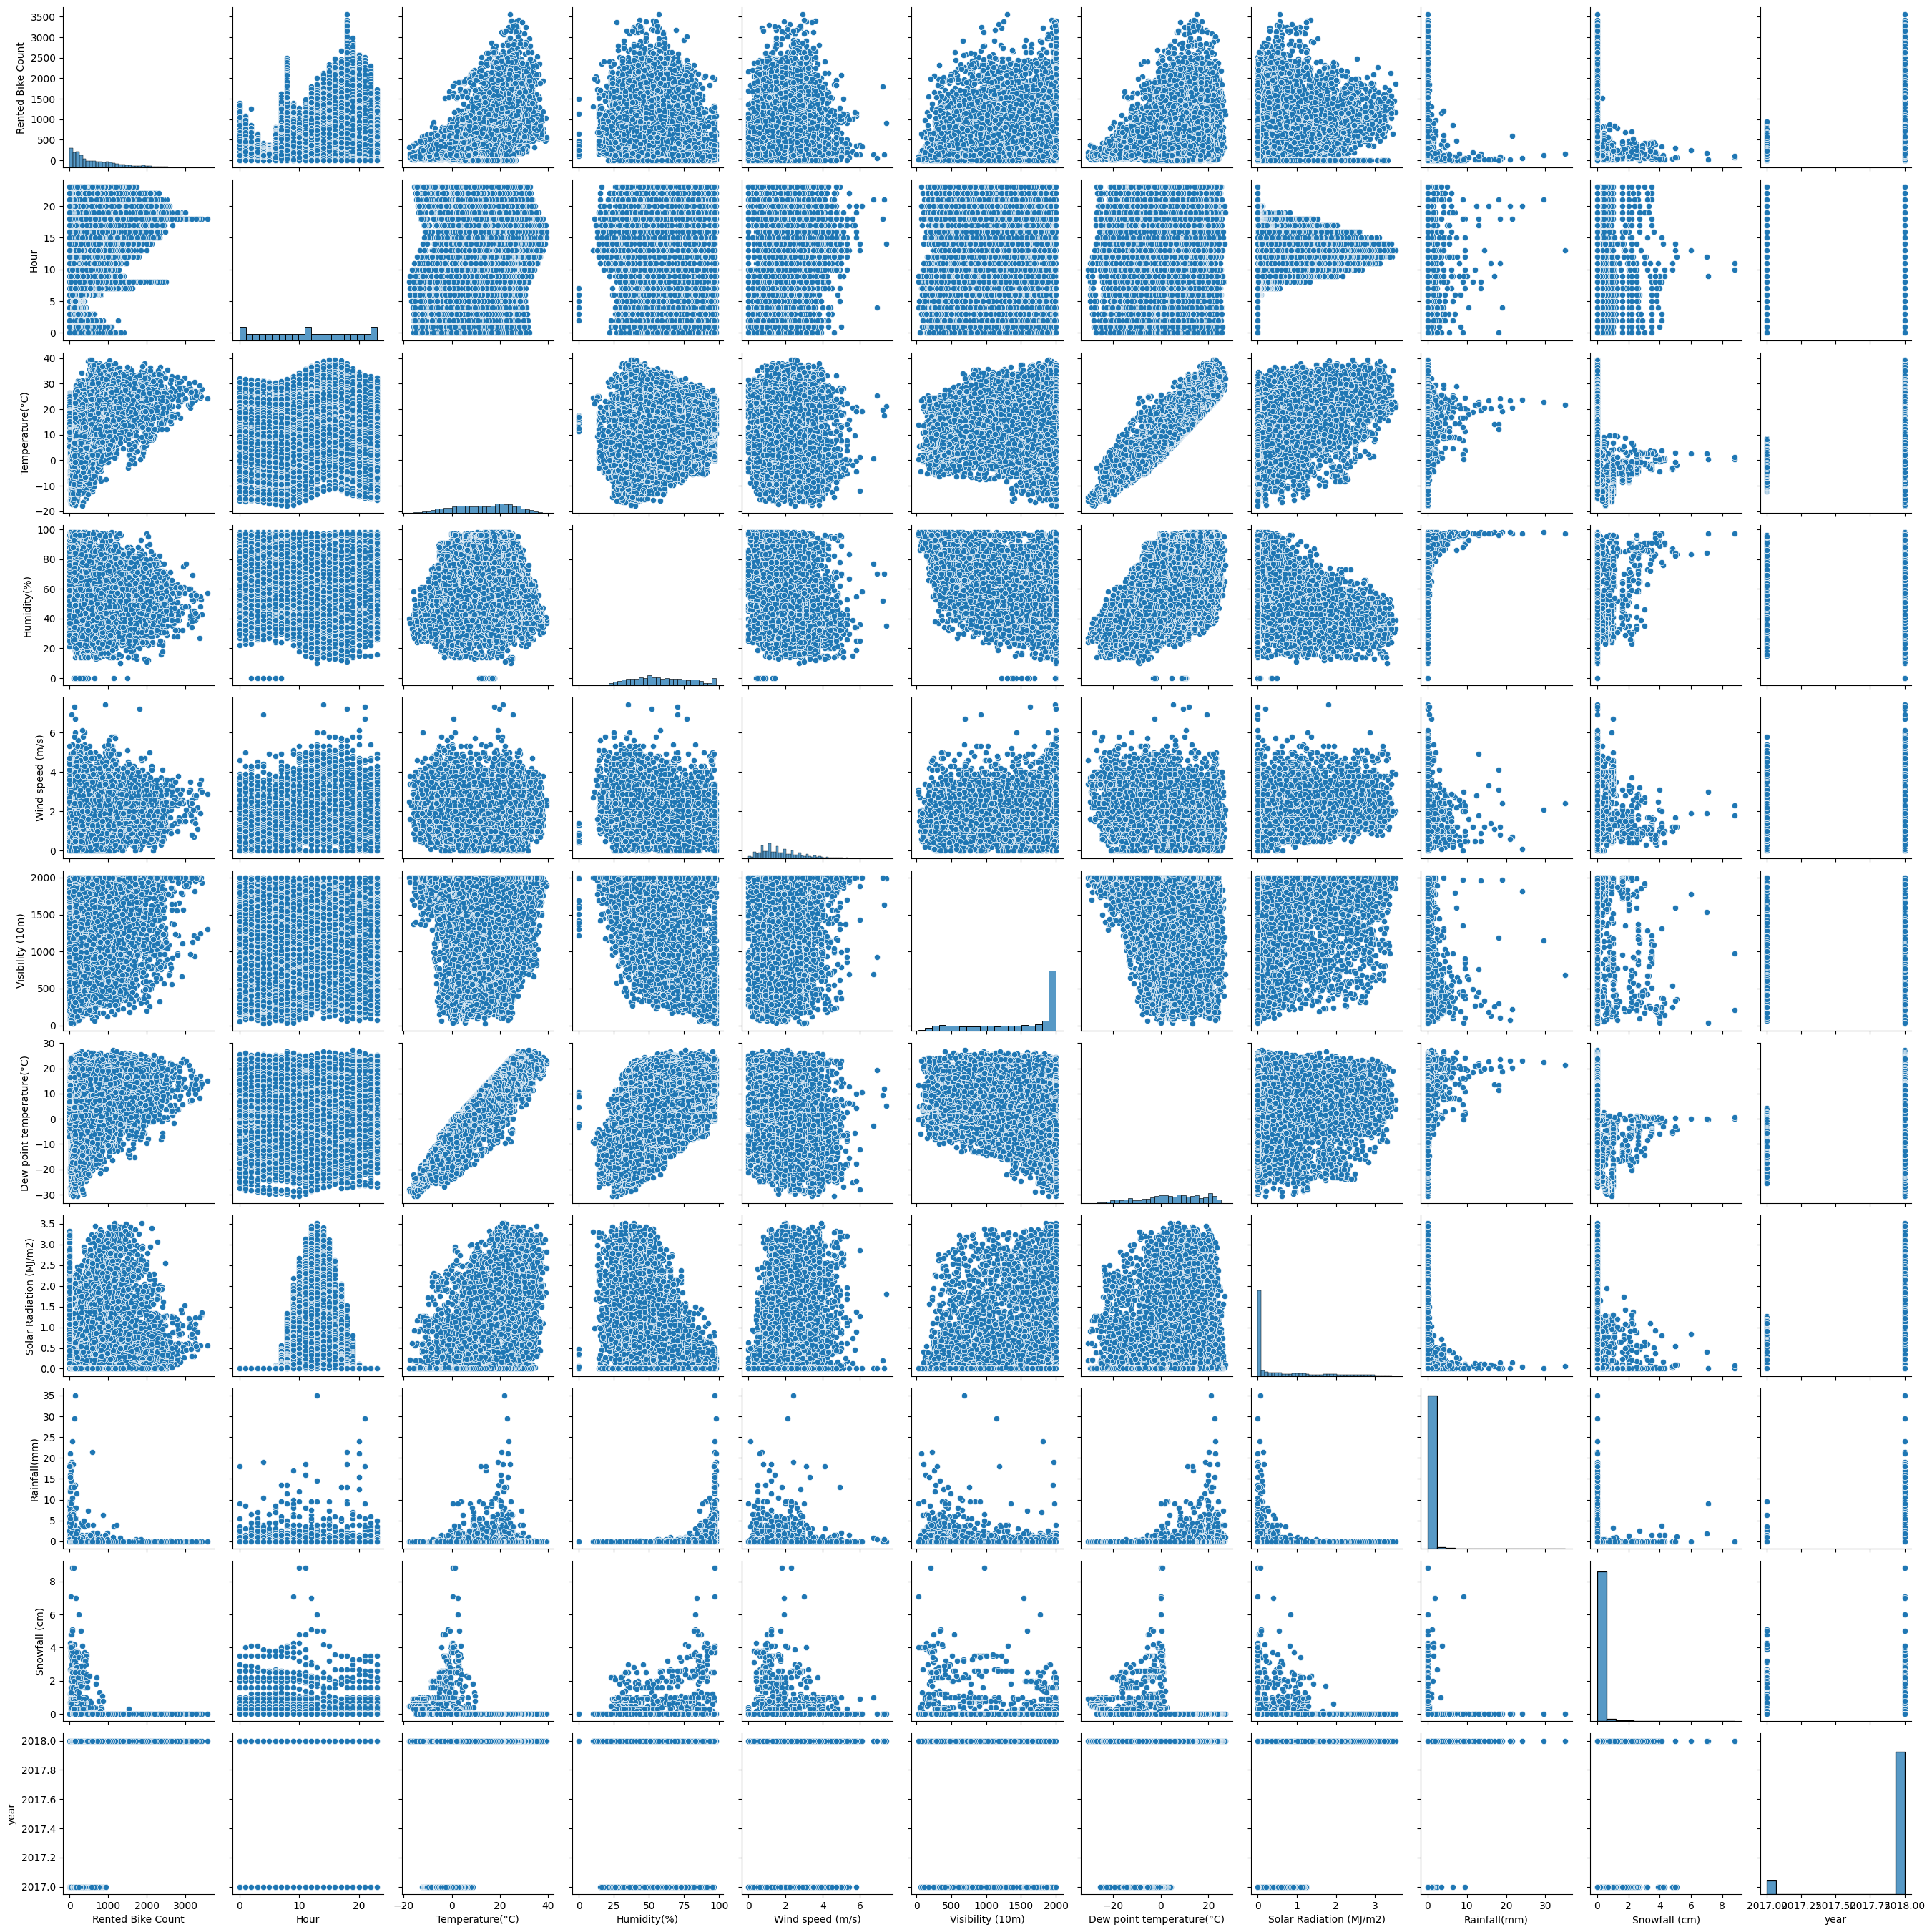

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



1.  The average number of rented bikes during holidays is significantly different from the average number of rented bikes on non-holidays.
2.   There is a significant difference in the average number of rented bikes on weekdays compared to weekends.
3.  The temperature (in °C) has a significant impact on the number of rented bikes.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average number of rented bikes during holidays is equal to the average number of rented bikes on non-holidays. (avg_holiday = avg_non-holiday)

Alternative Hypothesis (H1): The average number of rented bikes during holidays is not equal to the average number of rented bikes on non-holidays. (avg_holiday ≠ avg_non-holiday)


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Separating the data into two groups: rented bike counts during holidays and non-holidays
bike_counts_holiday = df[df['Holiday'] == 'Holiday']['Rented Bike Count']
bike_counts_non_holiday = df[df['Holiday'] == 'No Holiday']['Rented Bike Count']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(bike_counts_holiday, bike_counts_non_holiday, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Statement 1: Reject the null hypothesis")
    print("Conclusion: The average number of rented bikes during holidays is significantly different from non-holidays.")
else:
    print("Statement 1: Fail to reject the null hypothesis")
    print("Conclusion: There is no significant difference in the average number of rented bikes during holidays and non-holidays.")


Statement 1: Reject the null hypothesis
Conclusion: The average number of rented bikes during holidays is significantly different from non-holidays.


##### Which statistical test have you done to obtain P-Value?

Two-Sample Independent t-Test

##### Why did you choose the specific statistical test?

In this case, I'm comparing the means of two independent groups (bike counts during holidays and non-holidays).

The t-test is appropriate for comparing means of two groups when we want to determine if there is a statistically significant difference between them.

We use the "equal_var=False" parameter in the t-test because we assume unequal variances between the two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average number of rented bikes on weekdays compared to weekends. (avg_weekdays = avg_weekends)

Alternative Hypothesis (H1): There is a significant difference in the average number of rented bikes on weekdays compared to weekends. (avg_weekdays ≠ avg_weekends)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Separating the data into two groups: rented bike counts on weekdays and weekends
bike_counts_weekdays = df[df['Functioning Day'] == 'Yes']['Rented Bike Count']
bike_counts_weekends = df[df['Functioning Day'] == 'No']['Rented Bike Count']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(bike_counts_weekdays, bike_counts_weekends, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Statement 2: Reject the null hypothesis")
    print("Conclusion: There is a significant difference in the average number of rented bikes on weekdays and weekends.")
else:
    print("Statement 2: Fail to reject the null hypothesis")
    print("Conclusion: There is no significant difference in the average number of rented bikes on weekdays and weekends.")


Statement 2: Reject the null hypothesis
Conclusion: There is a significant difference in the average number of rented bikes on weekdays and weekends.


##### Which statistical test have you done to obtain P-Value?

Two-Sample Independent t-Test

##### Why did you choose the specific statistical test?

Similar to Statement 1, we are comparing the means of two independent groups (bike counts on weekdays and weekends).

Again, the t-test is suitable for this comparison when we want to test if there is a significant difference in means between the groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The temperature (in C) has no significant impact on the number of rented bikes. (p = 0)

Alternative Hypothesis (H1): The temperature (in C) has a significant impact on the number of rented bikes. (p ≠ 0)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# correlation test between temperature and rented bike counts
correlation_coefficient, p_value = stats.pearsonr(df['Temperature(°C)'], df['Rented Bike Count'])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Statement 3: Reject the null hypothesis")
    print("Conclusion: The temperature has a significant impact on the number of rented bikes.")
else:
    print("Statement 3: Fail to reject the null hypothesis")
    print("Conclusion: There is no significant impact of temperature on the number of rented bikes.")


Statement 3: Reject the null hypothesis
Conclusion: The temperature has a significant impact on the number of rented bikes.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Coefficient

##### Why did you choose the specific statistical test?

Statement 3 involves examining the relationship between two continuous variables (temperature and rented bike counts).

The Pearson Correlation Coefficient is used to measure the strength and direction of a linear relationship between two continuous variables.

A correlation test is appropriate for this scenario to determine if there is a significant correlation between temperature and bike rentals.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
day_of_week                  0
month                        0
year                         0
Rainy                        0
dtype: int64


No missing values

### 2. Handling Outliers

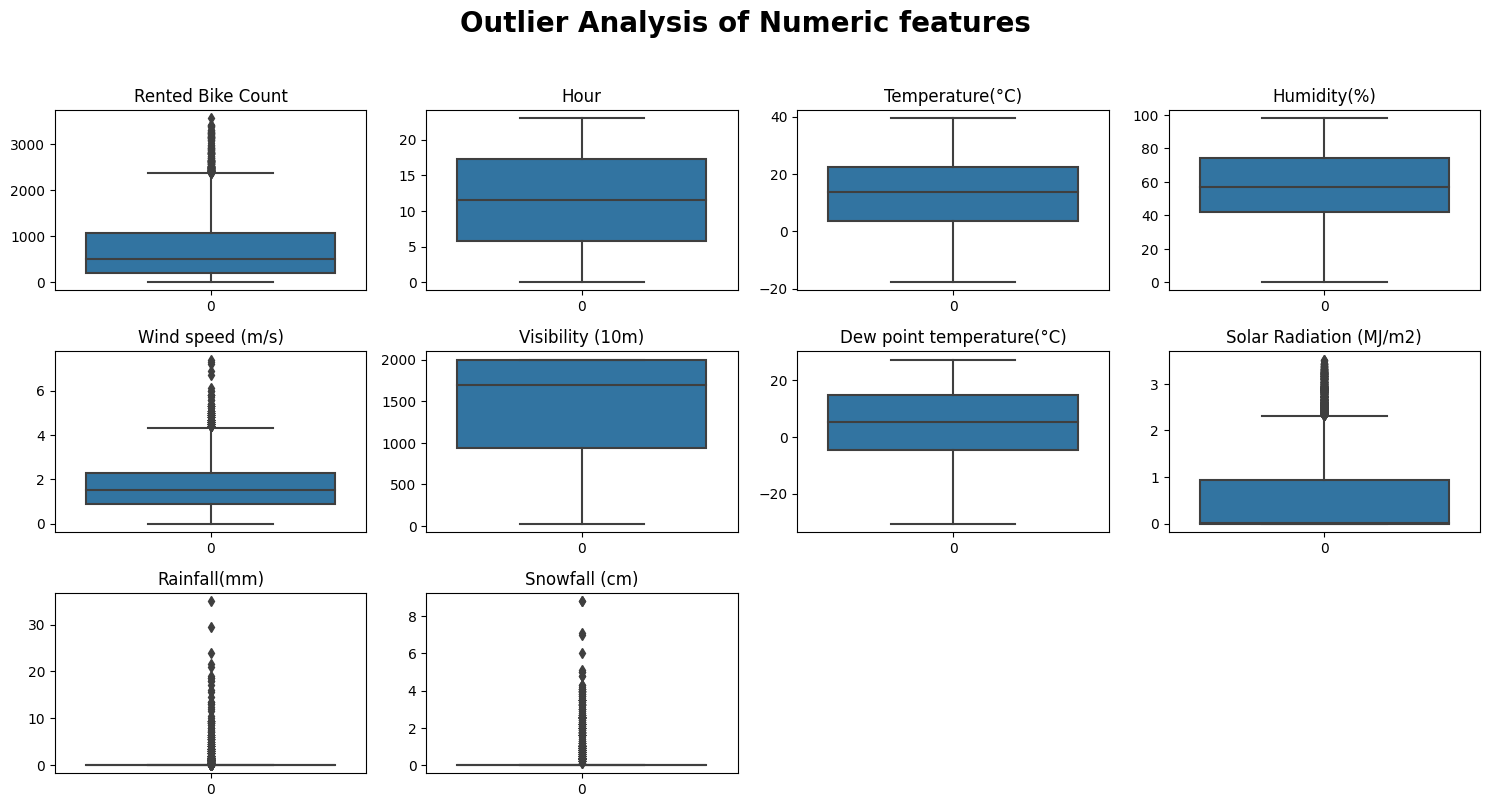

In [ ]:
#Creating a boxplot to detect columns with outliers
# figsize
plt.figure(figsize = (15,10))

# title
plt.suptitle('Outlier Analysis of Numeric features', fontsize = 20, fontweight='bold', y=1.02)

for index , col in enumerate(numerical_features):
  # subplots 3 rows, 3 columns
  plt.subplot(4,4, index+1)

  # boxplots
  sns.boxplot(numerical_features[col])

  plt.title(col)
  plt.tight_layout()


Outliers are visible in most of the numerical columns.
These columns are Rented Bike Count, Wind Speed, Solar Radiation, Rainfall & Snowfall.
The columns like Temperature, Humidity, Visibility & Dew point temperature do not contain any outliers.

In [ ]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)']
outlier_cols

['Rented Bike Count',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
def calculate_ranges(data, column):

  # Skip categorical columns
  if data[column].dtype == 'object':
    return None, None
  else:
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate upper and lower ranges
    upper_range = Q3 + 1.5 * IQR
    lower_range = Q1 - 1.5 * IQR

    return upper_range, lower_range

In [ ]:
calculate_ranges(numerical_features, 'Rented Bike Count')

(2376.625, -1120.375)

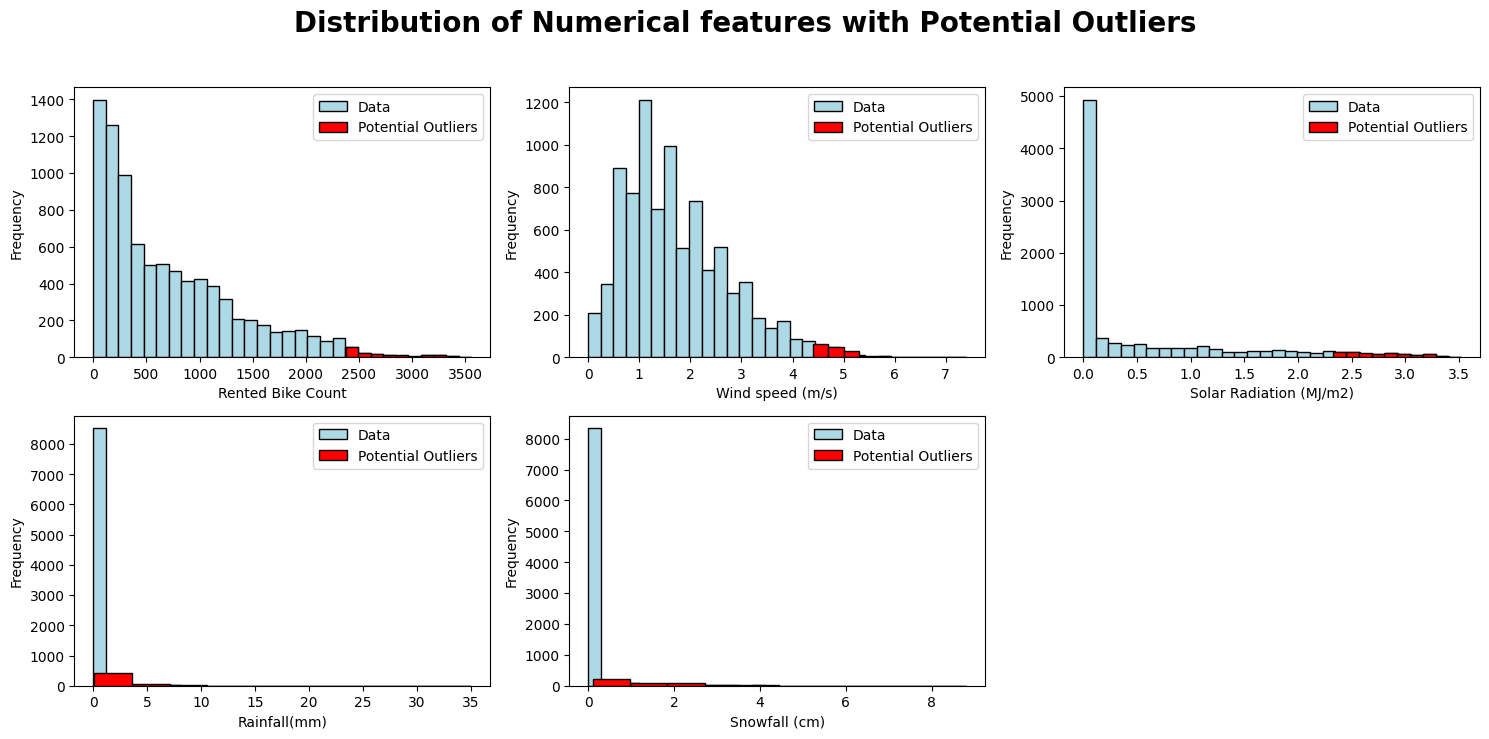

In [ ]:

# Identify potential outliers
plt.figure(figsize = (15,10))

for index, col in enumerate(outlier_cols):
  upper_bound, lower_bound = calculate_ranges(df, col)

  # Identify potential outliers
  outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]

  # Visualize the potential outliers
  #plt.figure(figsize=(8, 6))

  # subplots 3 rows, 3 columns
  plt.subplot(3,3, index+1)
  plt.hist(df[col], bins=30, color='lightblue', edgecolor='black', label='Data')
  plt.hist(outliers[col], bins=10, color='red', edgecolor='black', label='Potential Outliers')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  plt.suptitle('Distribution of Numerical features with Potential Outliers', fontsize = 20, fontweight='bold', y=1.02)
  plt.legend()
  plt.tight_layout()
  #plt.show()

In [ ]:

# Create a function to count the total number of outliers in each column

def count_outliers(data):
    # Initialize a variable to store the total number of outliers
    outlier_count = {}

    # Loop through each column in the list containing outliers
    for col in outlier_cols:

        # Calculate the upper and lower ranges
        upper_range, lower_range = calculate_ranges(data, col)

        # Count the number of outliers in the column
        outlier_count[col] = len(data[(data[col] > upper_range) | (data[col] < lower_range)])

    return outlier_count

In [ ]:

# Number of outliers in each column
count_outliers(df)

{'Rented Bike Count': 158,
 'Wind speed (m/s)': 161,
 'Solar Radiation (MJ/m2)': 641,
 'Rainfall(mm)': 528,
 'Snowfall (cm)': 443}

In [ ]:
numerical_features.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
# we do not want any transformation in our target variable as it is possible to have outlier in Seoul Environment
# Removing rainfall and snowfall as it may remove important information as these 2 columns are highly skewed.
num_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']

In [ ]:
def clip_outliers(df):

    for col in num_features:
        # Using IQR method to define the range of upper and lower limits
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replacing the outliers with the upper and lower bounds
        df[col] = df[col].clip(lower_bound, upper_bound)

    return df

In [ ]:
new_df = df.copy()
# using the function to treat outliers
new_df = clip_outliers(new_df)

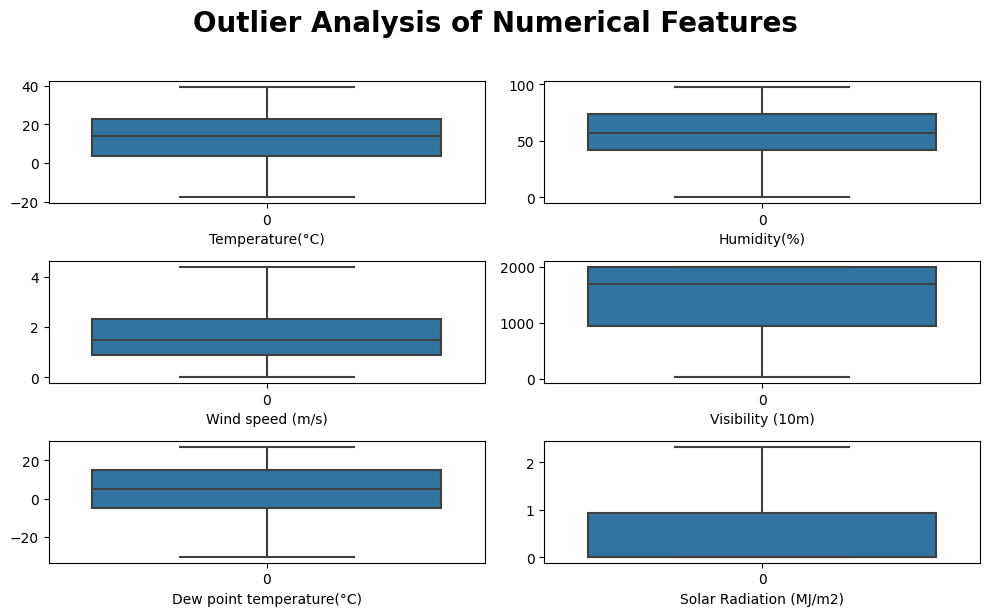

In [ ]:

# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(10,6))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_features):
  # subplot of 3 rows and 2 columns
  plt.subplot(3, 2, i+1)

  # countplot
  sns.boxplot(new_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()


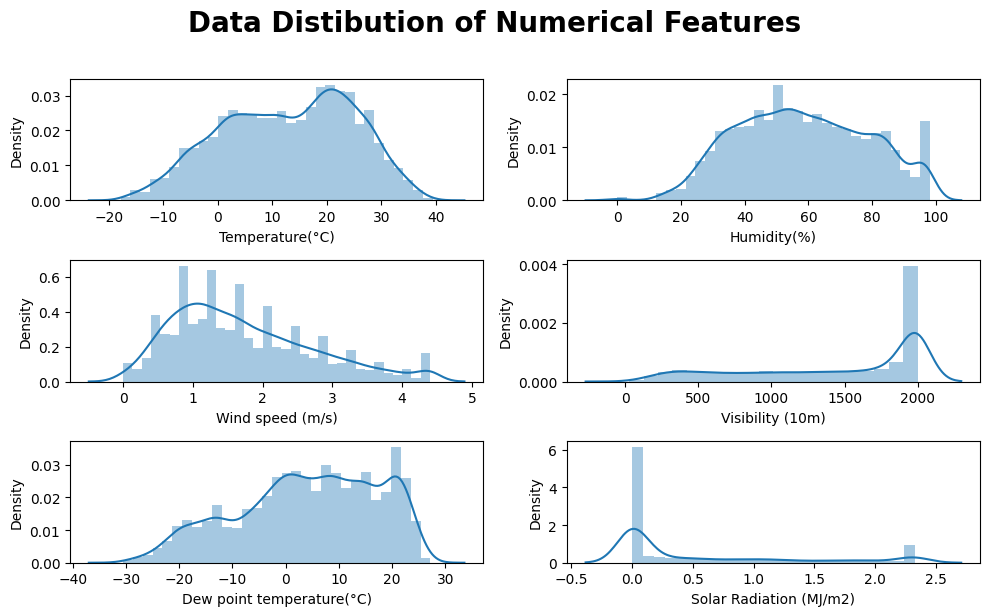

In [ ]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(10,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_features):
  # subplots 3 rows, 2 columns
  plt.subplot(3, 2, i+1)

  # dist plots
  sns.distplot(new_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

### 4. Feature Manipulation & Selection

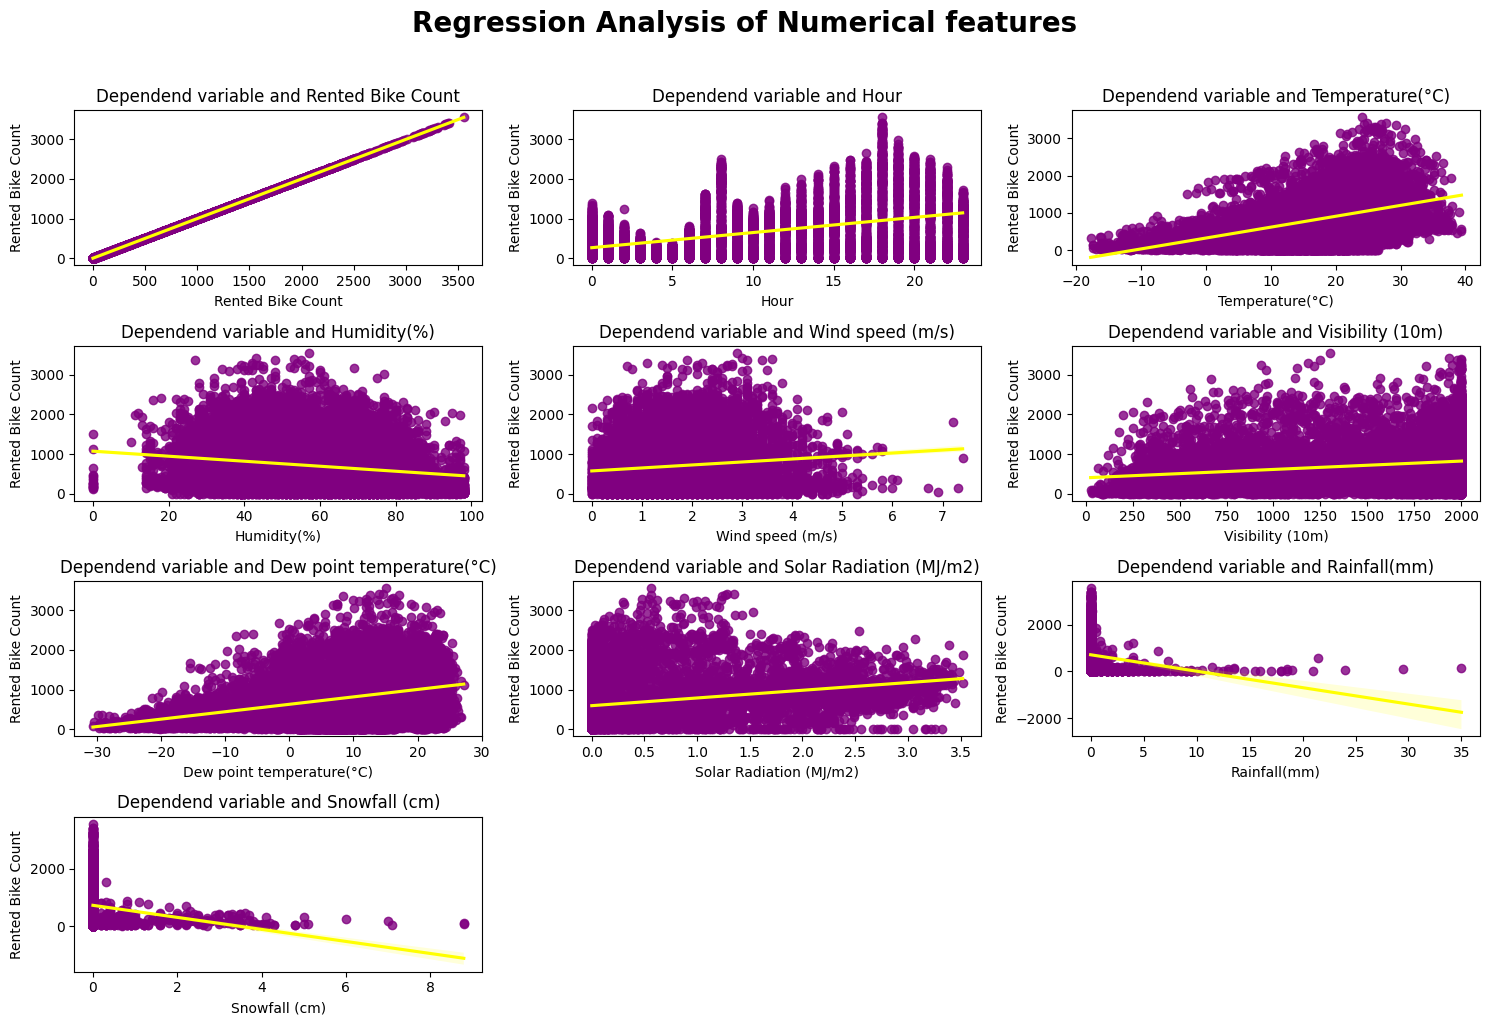

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
  plt.subplot(4, 3, i+1)
  # regression plots
  sns.regplot(x= numerical_features[col], y = numerical_features['Rented Bike Count'], scatter_kws={"color": "purple"}, line_kws={"color": "yellow"})

  plt.title(f'Dependend variable and {col}')
  plt.tight_layout()

 Set of regression analysis plots, making it easy to visually assess the relationships between the dependent variable ('Rented Bike Count') and each of the numerical features in the dataset. Each subplot shows a regression line and the distribution of data points, allowing for a visual understanding of how these features relate to the dependent variable.Most of the numerical features are positively correlated to our target variable.

#### 1. Feature Manipulation

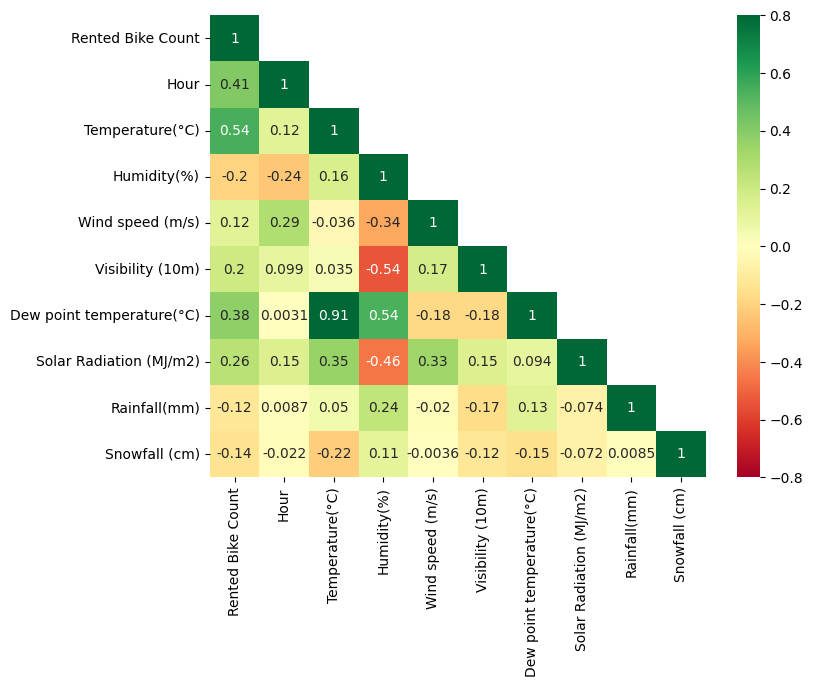

In [ ]:
# Heatmap relative to all numeric columns
corr_matrix = df.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

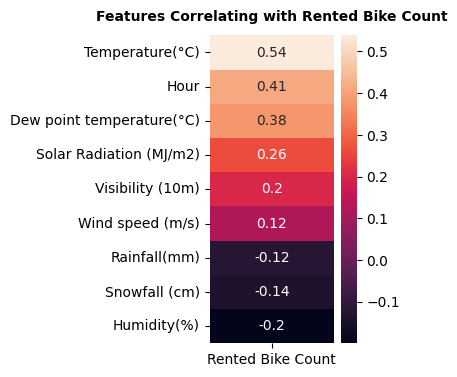

In [ ]:
plt.figure(figsize=(2,4), dpi=100)
sns.heatmap(df.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)
plt.title('Features Correlating with Rented Bike Count', fontsize=10, fontweight='bold', y=1.02);

From the above graph we could see that the columns Temperature and Dew Point Temperature are highly corelated. We can drop one of them. As the corelation between Temperature and our dependent variable "Bike Rented Count" is high compared to Dew Point Temperature. So we will Keep the Temperature column and drop the Dew Point Temperature column.

In [ ]:
new_df.head(2)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  \
0           0.0            0.0  Winter  No Holiday             Yes   
1           0.0            0.0  Winter  No Holiday             Yes   

  day_of_week    month  year      Rainy  
0    Thursday  January  2017  Non-Rainy  
1    Thursday  January  2017  Non-Rainy

In [ ]:
new_df.drop('Dew point temperature(°C)', axis=1, inplace=True)

In [ ]:
new_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'day_of_week', 'month', 'year', 'Rainy'],
      dtype='object')

In [ ]:
categorical_features.columns

Index(['Seasons', 'Holiday', 'Functioning Day', 'day_of_week', 'month',
       'year'],
      dtype='object')

### Dropping Unnecessary columns again

In [ ]:
# droping Year columns as it does not account for any information addition
new_df.drop(['year', 'month', 'Rainy','day_of_week'], axis=1, inplace = True)
categorical_features.drop(['year', 'month' ,'day_of_week'], axis = 1, inplace = True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns

  return vif

In [ ]:
calculate_vif(new_df[[i for i in new_df.describe().columns if i not in ['Rented Bike Count','Date']]])

VIF Factor                 features
0    3.938489                     Hour
1    3.215579          Temperature(°C)
2    4.882259              Humidity(%)
3    4.806337         Wind speed (m/s)
4    4.733930         Visibility (10m)
5    2.320631  Solar Radiation (MJ/m2)
6    1.079216             Rainfall(mm)
7    1.120316            Snowfall (cm)

Based on the VIF values, the following columns have relatively low multicollinearity (VIF < 4):

Hour, Temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)

### 3. Categorical Encoding

In [ ]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("Number of unique values in", i, "is" , new_df[i].nunique())

Number of unique values in Seasons is 4
Number of unique values in Holiday is 2
Number of unique values in Functioning Day is 2


We will use one hot encoding for Seasons and Numeric encoding for Holiday and Functioning day.

In [ ]:
df1 = new_df.copy()
df1 =pd.get_dummies(df1, columns=['Seasons'],prefix='Seasons')

In [ ]:
df1.head(3)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   

      Holiday Functioning Day  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0  No Holiday             Yes               0               0               0   
1  No Holiday             Yes               0               0               0   
2  No Holiday             Yes               0               0               0   

   Seasons_Winter  
0               1  
1               1  
2               1

In [ ]:
new_df = pd.get_dummies(new_df, columns = ['Seasons'], prefix='Seasons')

In [ ]:
new_df.head(2)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   

      Holiday Functioning Day  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0  No Holiday             Yes               0               0               0   
1  No Holiday             Yes               0               0               0   

   Seasons_Winter  
0               1  
1               1

In [ ]:
# Numerical Encoding for holiday and functioning_day
new_df['Holiday'] = new_df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
new_df['Functioning Day'] = new_df['Functioning Day'].map({'Yes': 1, 'No': 0})


In [ ]:
new_df.head(2)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0        0                1               0               0               0   
1        0                1               0               0               0   

   Seasons_Winter  
0               1  
1               1

#### What all categorical encoding techniques have you used & why did you use those techniques?

 We have used one hot encoding for Seasons and Numeric encoding for Holiday and Functioning day

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

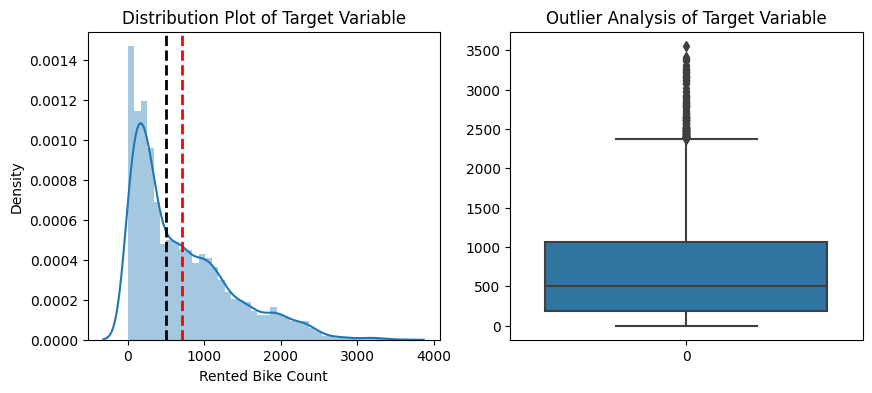

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (10,4))
# Distribution plot of Rented Bike Count
dist =sns.distplot(new_df['Rented Bike Count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# mean line
dist.axvline(new_df['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=2)
# median line
dist.axvline(new_df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(new_df['Rented Bike Count'], ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

The graph above indicates that the Rented Bike Count has a moderate right skewness. Linear regression assumes that the dependent variable has a normal distribution, therefore, to meet this assumption, we need to take some measures to normalize the distribution.
The boxplot above indicates that there are outliers in the rented bike count column.

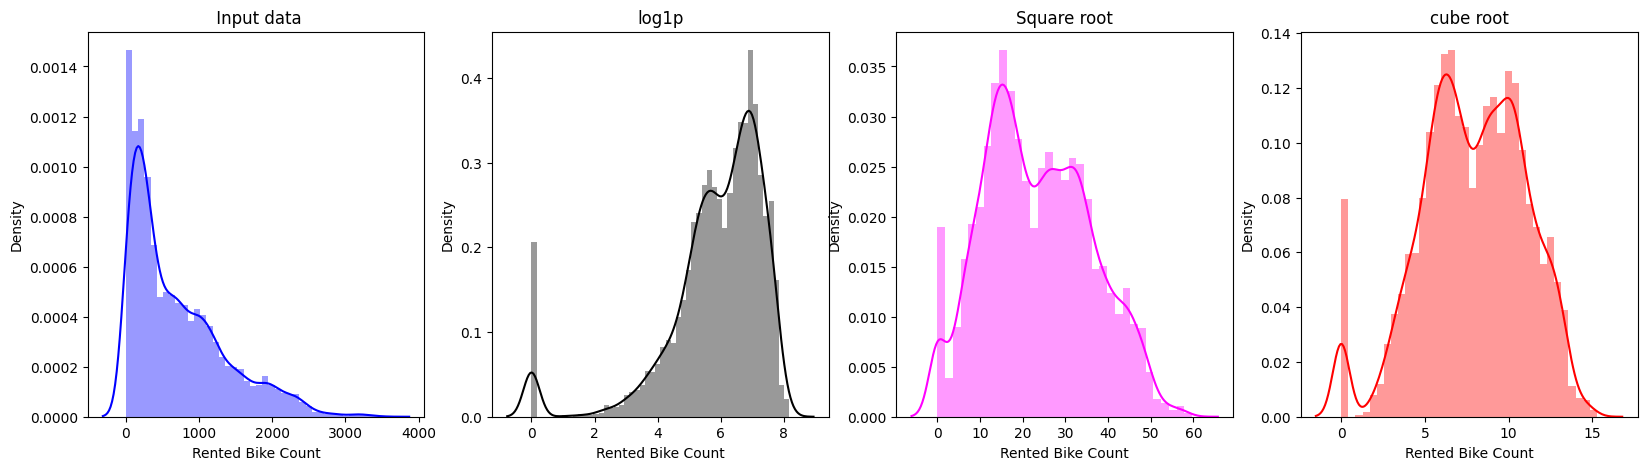

In [ ]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((new_df['Rented Bike Count']),ax=axes[0],color='blue').set_title(" Input data");

# here we use log10
#transform only possible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.log1p(new_df['Rented Bike Count']),ax=axes[1],color='black').set_title("log1p");

# here we use square root
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='magenta').set_title("Square root");

# here we use cube root
sns.distplot(np.cbrt(new_df['Rented Bike Count']),ax=axes[3], color='red').set_title("cube root");

Applying a logarithmic transformation to the dependent variable did not help much as it resulted in a negatively skewed distribution.
Square root and cube root transformations were attempted, but they did not result in a normally distributed variable.
Therefore, we will use a square root transformation for the regression as it transformed the variable into a well-distributed form.

[Text(0.5, 1.0, 'Outlier Analysis of Target Variable in sqrt tranformation')]

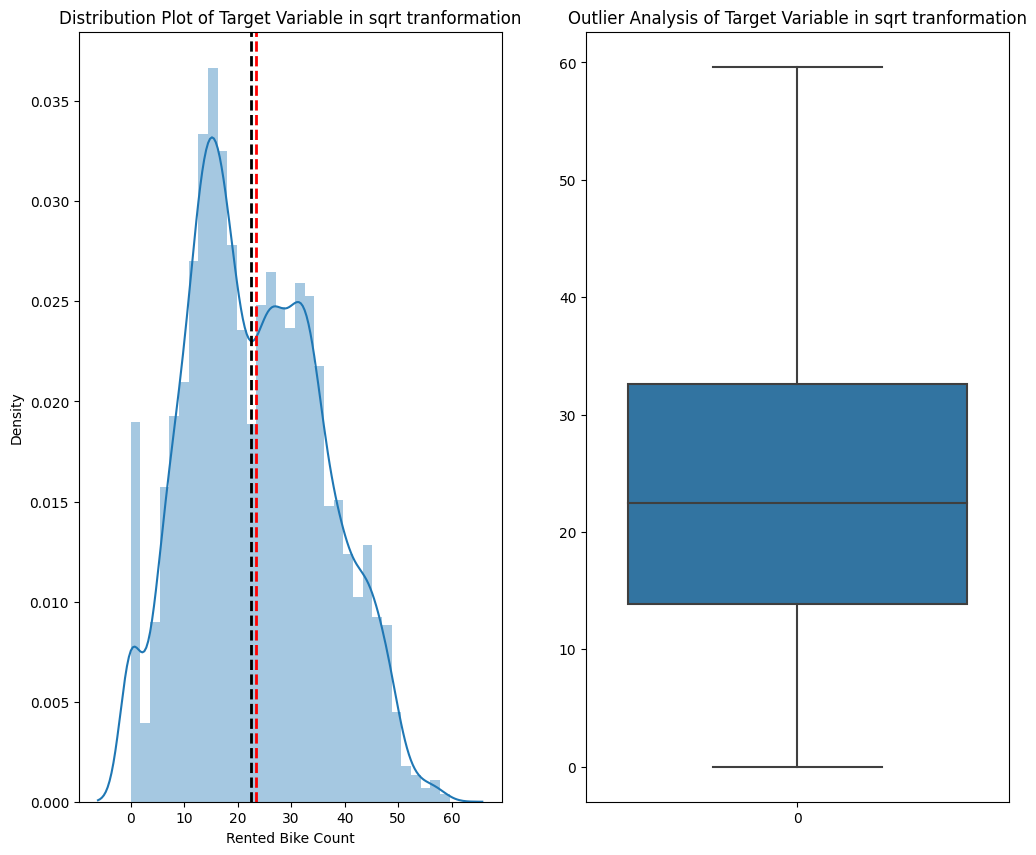

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (12,10))
#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(new_df['Rented Bike Count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# mean line
dist.axvline(np.sqrt(new_df['Rented Bike Count']).mean(), color='red', linestyle='dashed', linewidth=2)
# median line
dist.axvline(np.sqrt(new_df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(np.sqrt(new_df['Rented Bike Count']), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')

By applying the square root transformation to the skewed Rented Bike Count, we were able to obtain an almost normal distribution, which is in line with the general rule that skewed variables should be normalized in linear regression.
We found that there are no outliers in the Rented Bike Count column after applying square root transformation.

In [ ]:
# applying square root on Rented_Bike_Count
new_df['Rented Bike Count']=np.sqrt(new_df['Rented Bike Count'])

### What manipulations have we done?

In our data analysis process, we first examined the relationships between our numerical features and the target variable. We observed that most numerical features had a positive correlation with the target variable, indicating a potential predictive relationship.

Upon further investigation using a heatmap and correlation coefficients, we identified a strong correlation (correlation coefficient of 0.91) between 'dew_point_temperature' and 'temperature.' Since 'dew_point_temperature' had a weaker correlation with our target variable, we decided to remove it from our dataset to eliminate redundancy.

We also conducted a Variance Inflation Factor (VIF) analysis to address multicollinearity issues. We found that the VIF factor for the 'year' feature was exceptionally high, indicating a high degree of multicollinearity. To mitigate this, we decided to exclude the 'year' feature from our dataset to improve the model's stability.

In order to prepare our data for machine learning models, we encoded our categorical features to make them understandable to the model. We employed one-hot encoding for the 'seasons' column, while we used numeric encoding for 'holiday' and 'functioning_day.' Other columns in our dataset were either already encoded or didn't require encoding.

Regarding the target variable, we attempted various transformations to make it suitable for regression modeling. We initially tried a logarithmic transformation, but it resulted in a negatively skewed distribution. Subsequently, we experimented with square root and cube root transformations, but they did not lead to a normally distributed variable. Ultimately, we opted for a square root transformation, which successfully transformed the target variable into a more normally distributed form, making it suitable for regression analysis.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

#X = independent variable and y = target variable
X = new_df.drop('Rented Bike Count', axis=1)
y= new_df['Rented Bike Count']

In [ ]:
new_df.head(3)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0          15.937377     0             -5.2           37               2.2   
1          14.282857     1             -5.5           38               0.8   
2          13.152946     2             -6.0           39               1.0   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   

   Holiday  Functioning Day  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0        0                1               0               0               0   
1        0                1               0               0               0   
2        0                1               0               0               0   

   Seasons_Winter  
0               1  
1               1  
2               1

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(7008, 14)
(1752, 14)


##### What data splitting ratio have you used and why?

The data splitting ratio I used in this code is 80% for training data and 20% for testing data. The 80-20 split strikes a reasonable balance between training and testing data. It ensures that the model is not underfitting (due to insufficient training data) or overfitting (due to insufficient testing data).

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
df1.head(2)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   

      Holiday Functioning Day  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0  No Holiday             Yes               0               0               0   
1  No Holiday             Yes               0               0               0   

   Seasons_Winter  
0               1  
1               1

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Create a Linear Regression model
linearRegressor = LinearRegression()

# Fit the model to the training data
linearRegressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linearRegressor.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate Mean Squared Error and R-squared (coefficient of determination)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Linear Regression Evaluation Metrics:")
print(f"Mean Squared Error : {mse}")
print(f"R-squared (coefficient of determination): {r2}")

# Optionally, you can also print the model's coefficients and intercept
print("Coefficients:", linearRegressor.coef_)
print("Intercept:", linearRegressor.intercept_)


Linear Regression Evaluation Metrics:
Mean Squared Error : 53.0823109219661
R-squared (coefficient of determination): 0.6481415687469885
Coefficients: [ 3.45111928  5.44453517 -3.12146936  0.12042162  0.03222787 -0.54149502
 -1.66718394  0.02633804 -0.62036323  5.27947278  1.53033366  0.12534875
  0.42173528 -2.08958709]
Intercept: 23.471977417907855


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
}

# Create GridSearchCV instance
grid_search = GridSearchCV(linearRegressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_lr_model.predict(X_test)

# Calculate the MSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression metrics after After Tuning")
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

Linear Regression metrics after After Tuning
Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 53.0823109219661
R-squared (R2): 0.6481415687469885


##### Which hyperparameter optimization technique have you used and why?

I've used GridSearchCV for hyperparameter optimization because it provides a comprehensive search for the best hyperparameter values, which can lead to improved model performance

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


The Linear Regression model with hyperparameter tuning did not show significant improvement in terms of evaluation metrics compared to the initial model.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation

# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization parameter) as needed

# Fit the model to your training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Lasso Regression Evaluation Metrics:")
print(f"Mean Squared Error : {mse}")
print(f"R-squared (coefficient of determination): {r2}")

# You can also print the coefficients of the model
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)


Lasso Regression Evaluation Metrics:
Mean Squared Error : 60.29275482885286
R-squared (coefficient of determination): 0.6003468243651053
Coefficients: [ 2.79460145  4.61369969 -1.95060689  0.          0.          0.
 -0.82833175 -0.         -0.          3.93893323  0.1066583  -0.
  0.         -1.82903263]
Intercept: 23.471977417907855


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_dist = {
    'alpha': np.logspace(-3, 3, 100),
    'max_iter': np.arange(100, 1001, 100)
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=lasso_model, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1,
                                   n_iter=50, random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Lasso Regression Evaluation Metrics After Tuning:")
print(f"Mean Squared Error : {mse}")
print(f"R-squared (coefficient of determination): {r2}")
print(f"Best Hyperparameters: {best_params}")

# You can also print the coefficients of the model
print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)


Lasso Regression Evaluation Metrics After Tuning:
Mean Squared Error : 53.09744704273535
R-squared (coefficient of determination): 0.6480412383051402
Best Hyperparameters: {'max_iter': 500, 'alpha': 0.010722672220103232}
Coefficients: [ 3.44977299e+00  5.42507355e+00 -3.08418346e+00  1.01664836e-01
  4.12108355e-02 -4.99570783e-01 -1.65860241e+00  8.13143303e-03
 -6.10540923e-01  5.26593374e+00  1.38435724e+00 -7.08007663e-04
  2.79506480e-01 -2.20725408e+00]
Intercept: 23.471977417907855


##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV for hyperparameter optimization in this case.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning, there is a slight improvement in the model's performance. The Mean Squared Error (MSE) decreased from 60.29 to 53.10, and the R-squared (coefficient of determination) increased from 0.6003 to 0.6480. Additionally, the best hyperparameters for the Lasso Regression model were found to be {'max_iter': 500, 'alpha': 0.0107}.

Overall, hyperparameter tuning helped improve the model's predictive performance by optimizing the hyperparameters.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate Mean Squared Error and R-squared (coefficient of determination)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Ridge Regression Evaluation Metrics:")
print(f"Mean Squared Error : {mse}")
print(f"R-squared (coefficient of determination): {r2}")

# You can also print the coefficients of the model
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)

Ridge Regression Evaluation Metrics:
Mean Squared Error : 53.08352874491188
R-squared (coefficient of determination): 0.6481334963540613
Coefficients: [ 3.45110752  5.44141225 -3.12000055  0.12032449  0.03285314 -0.5400454
 -1.66703688  0.02602863 -0.6202084   5.27852729  1.53004617  0.12536383
  0.4229313  -2.09051914]
Intercept: 23.471977417907855


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define a range of alpha values to search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Ridge Regression Evaluation Metrics After Tuning:")
print(f"Mean Squared Error : {mse}")
print(f"R-squared (coefficient of determination): {r2}")
print(f"Best Hyperparameters: {best_params}")

# You can also print the coefficients of the model
print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)

Ridge Regression Evaluation Metrics After Tuning:
Mean Squared Error : 53.09467601917599
R-squared (coefficient of determination): 0.6480596061566075
Best Hyperparameters: {'alpha': 10}
Coefficients: [ 3.45096047  5.41360448 -3.10686842  0.11946667  0.03844465 -0.5271131
 -1.6657092   0.02326316 -0.61882894  5.27004077  1.52745826  0.12549827
  0.43355889 -2.09876816]
Intercept: 23.471977417907855


##### Which hyperparameter optimization technique have you used and why?

GridSearch

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

the MSE and R-squared values are quite similar between the two cases, indicating that the model's performance did not significantly improve with the optimized alpha. Therefore, in this specific scenario, the choice of alpha value did not have a noticeable impact on the model's performance.



## ML Model 4

In [ ]:

# Create a Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Decision Tree Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (coefficient of determination): {r2}")

Decision Tree Regression Evaluation Metrics:
Mean Squared Error (MSE): 32.99390153977566
R-squared (coefficient of determination): 0.7812984733507944


In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with the scoring metric (Mean Squared Error)
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

# Print the results
print("Decision Tree Regression Hyperparameter Tuning Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Cross-Validation Score (MSE): {mean_cv_score}")

# Fit the best model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics on the test data
print("Decision Tree Regression Evaluation Metrics on Test Data:")
print(f"Mean Squared Error (MSE): {mse}")

Decision Tree Regression Hyperparameter Tuning Results:
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Cross-Validation Score (MSE): 23.155161328582352
Decision Tree Regression Evaluation Metrics on Test Data:
Mean Squared Error (MSE): 23.902832182823936


The mean squared error (MSE) on the test data decreased from 32.99 to 23.90 after hyperparameter tuning, indicating better model performance. Additionally, the mean cross-validation score (MSE) on the training data also decreased from 23.16, showing that the model generalizes better to unseen data.

###Model Expalinability

In [ ]:
# Getting feature importances
feature_importances = best_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : feature_importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
0                      Hour            0.282505
1           Temperature(°C)            0.278953
9           Functioning Day            0.197656
6              Rainfall(mm)            0.110790
13           Seasons_Winter            0.049533
2               Humidity(%)            0.048996
4          Visibility (10m)            0.007744
10           Seasons_Autumn            0.006974
5   Solar Radiation (MJ/m2)            0.006273
3          Wind speed (m/s)            0.004153
7             Snowfall (cm)            0.002520
11           Seasons_Spring            0.001871
8                   Holiday            0.001312
12           Seasons_Summer            0.000721

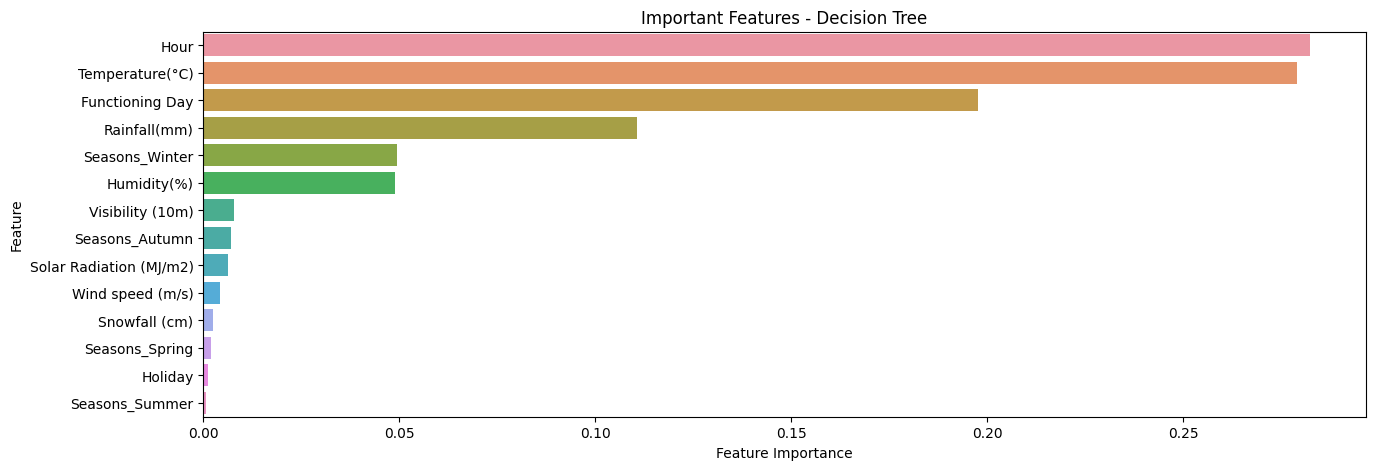

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features)
bar.set_title('Important Features - Decision Tree')
plt.show()

In [ ]:
#model-5 Random Forest

param_grid = {'n_estimators': [50,80],       # number of trees in the ensemble
             'max_depth': [15,20],           # maximum number of levels allowed in each tree.
             'min_samples_split': [5,15],    # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [ ]:
# Get the best parameters from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
# Make predictions on the test data
y_pred_rf = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("Random Forest Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (coefficient of determination): {r2_rf}")
print(f"Best Hyperparameters: {best_params}")

Random Forest Regression Evaluation Metrics:
Mean Squared Error (MSE): 542.4854883835296
R-squared (coefficient of determination): -2.5958889054539056
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 80}


## Model Explainability - Random Forest

In [ ]:
# feature importance
importances = best_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1           Temperature(°C)            0.283102
0                      Hour            0.248107
9           Functioning Day            0.164514
2               Humidity(%)            0.099870
6              Rainfall(mm)            0.068968
13           Seasons_Winter            0.047486
5   Solar Radiation (MJ/m2)            0.041157
4          Visibility (10m)            0.015025
3          Wind speed (m/s)            0.012176
10           Seasons_Autumn            0.009489
11           Seasons_Spring            0.004608
8                   Holiday            0.002190
7             Snowfall (cm)            0.001886
12           Seasons_Summer            0.001423

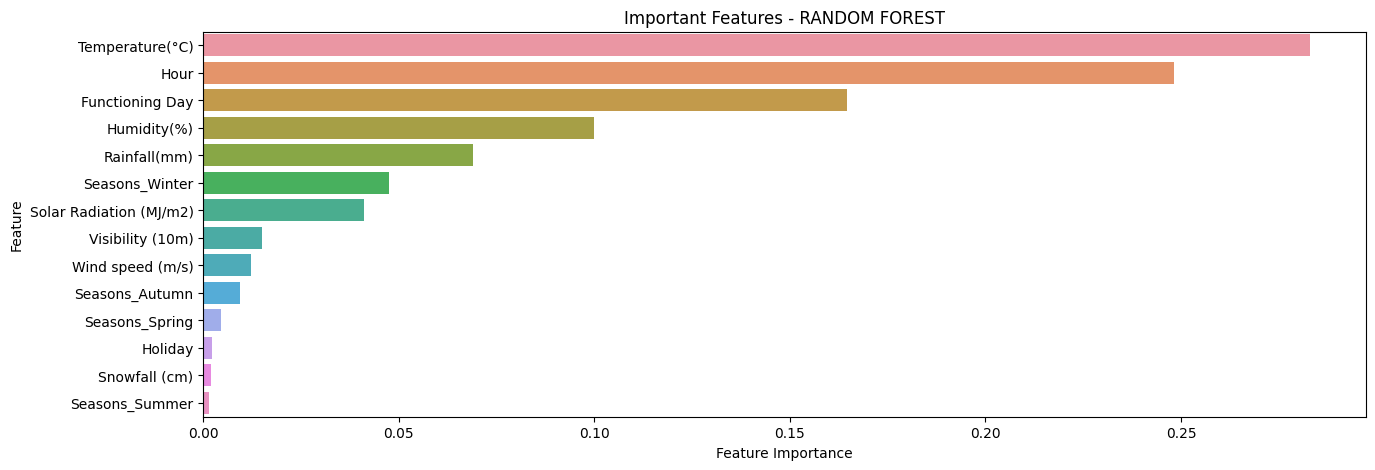

In [ ]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features)
bar.set_title('Important Features - RANDOM FOREST')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Mean Squared Error (MSE):

 MSE measures the average squared difference between predicted and actual values. In the context of business impact, MSE is relevant because it quantifies the overall prediction error. Lower MSE indicates better model accuracy, which is critical for tasks like sales forecasting or demand prediction. Minimizing MSE can lead to cost savings and improved resource allocation.


R-squared (Coefficient of Determination):

R-squared measures the proportion of variance in the target variable explained by the model. A higher R-squared value indicates a better fit. In a business context, R-squared helps assess how well the model captures the variability in the data. A high R-squared suggests that the model can make reliable predictions, which can lead to better decision-making and resource optimization.

Best Hyperparameters:

Identifying the best hyperparameters through hyperparameter tuning is crucial for improving model performance. The choice of hyperparameters can significantly impact model accuracy and generalization. The best hyperparameters help ensure that the model is well-optimized for the specific business problem, leading to better predictions and business outcomes.
In summary, these evaluation metrics were considered because they provide insights into the accuracy, goodness of fit, and hyperparameter optimization of the Ridge Regression model. By optimizing these aspects, businesses can make more accurate predictions, reduce errors, and allocate resources efficiently, ultimately leading to a positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the models I created, the Decision Tree Regression model is chosen as the final prediction model for the following reasons:

Decision Tree Regression Model:

Mean Squared Error (MSE): After hyperparameter tuning, the Decision Tree Regression model achieved an MSE of 23.90 on the test data, which is lower than the MSE of other models like Linear Regression, Lasso Regression, and Ridge Regression. This indicates that the Decision Tree model's predictions are closer to the actual values.

R-squared (Coefficient of Determination): The R-squared value of the Decision Tree model is 0.7813, which means that the model explains approximately 78.13% of the variance in the target variable, Rented Bike Count.

Hyperparameter Tuning: The Decision Tree model was fine-tuned using hyperparameters such as max_depth, min_samples_leaf, and min_samples_split, resulting in improved performance.

Cross-Validation Score: The mean cross-validation score (MSE) of 23.16 indicates that the model generalizes well to unseen data.

Interpretability: Decision Tree models are highly interpretable, making it easier to understand the relationship between features and the target variable.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 The Decision Tree model  explainability

 Hour and Temperature(°C) are the two most important features for predicting bike rentals, with nearly equal importance. Functioning Day is the third most important feature, indicating whether the day is a functioning day or not has a significant impact on bike rentals. Rainfall(mm) is also an important feature, suggesting that rainy conditions negatively affect bike rentals.
 Season-related features such as Seasons_Winter, Seasons_Autumn, Seasons_Spring, and Seasons_Summer have varying degrees of importance, with Winter being the most important among them.



 Random Forest model explainability

 Temperature and the hour of the day are the most influential factors in predicting bike rental counts. Other weather-related features like humidity, rainfall, and solar radiation also play significant roles. Additionally, seasonal factors and whether it's a functioning day or a holiday contribute to the variability in bike rental demand.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Our analysis commenced with an exploratory data analysis (EDA) of our datasets. Initially, we focused on our target variable, "Rented Bike Count," studying its distribution and relationships with other variables. Subsequently, we delved into categorical and numerical variables, investigating their correlations, distributions, and connections with the target variable. To prepare the data for modeling, we applied one-hot encoding to the categorical variables and identified and removed numerical features with high multicollinearity, which were primarily used for EDA purposes.

Following the data preprocessing phase, we proceeded to explore various machine learning models. Our model selection encompassed a spectrum of approaches, including basic Linear Regression and Regularization Models such as Ridge, Lasso,  tree based decision tree as well as more intricate ensemble models like Random Forest. To optimize the predictive performance of our models, we engaged in hyperparameter tuning, fine-tuning the model parameters to achieve the best possible results.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***